# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

Real-world Data Wrangling project. We will do data wrangling for two of separete dataset Census-Imcome and Hotel-Booking-Demand that garther from a variety of sources and in a variety of formats. After the ouput of wrangling processing will be used to make some visualize to answer some interested question. Nice ! 

### * Beginning the fisrt step we will garthering the Census-Income and Hotel-Booking-Demand dataset 

### **1.2.** Gather at least two datasets using two different data gathering methods

### **Dataset 1**: Census Income
- link: [Census Income](https://archive.ics.uci.edu/dataset/20/census+income)
- Type: Zip File

__Method:__ The data was gathered by download load zip file from archive repository https://archive.ics.uci.edu/static/public/20/census+income.zip" to local, extract to raw_data folder. 

__Dataset Information:__ 
This datataset extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)), also knowned as The adult dataset. The adult dataset is a fairly large set (https://archive.ics.uci.edu/dataset/20/census+income)[https://archive.ics.uci.edu/dataset/20/census+income], consisting of 48,842 instances. There are 14 census factor that would be described below.

__Dataset variables:__
*    __age__: Age.
*    __workclass__: Income (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked).
*    __fnlwgt__: N/A.
*    __education__: Education Level (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool).
*    __education-num__: Education Level.
*    __marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
*    __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
*    __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
*    __race__: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black).
*    __sex__: Sex (Female, Male).
*    __capital-gain__: N/A.
*    __capital-loss__: N/A.
*    __hours-per-week__: working hour per week.
*    __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
*    __class__: >50K, <=50K'

- Question: I would like to have picture about distribution of the Census factor like: Age, Education, Occupation, Workclass through income data.

In [2]:
import numpy as np
import pandas as pd
import requests
import re
import zipfile

In [3]:
%pwd

'/workspace'

In [4]:
url = 'https://archive.ics.uci.edu/static/public/20/census+income.zip'
save_path = '/workspace/census+income.zip'
response = requests.get(url, stream=True)

with open(save_path, 'wb') as fd:
    for chunk in response.iter_content(chunk_size=128):
        fd.write(chunk)

In [5]:
targetdir = 'raw_data'

with zipfile.ZipFile(save_path, "r") as zip_ref:
    zip_ref.extractall(targetdir)

In [6]:
%ls raw_data/

Index  adult.data  adult.names  adult.test  hotel-booking.csv  old.adult.names


In [7]:
names_path = 'raw_data/old.adult.names'
data_path = 'raw_data/adult.data'
regex = r"(^[\w-]+):"

names_text = None

with open(names_path) as f:
    names_text = f.read()

attribute_names = re.findall(regex, names_text, re.MULTILINE)
attribute_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'class']

In [8]:
df_1 = pd.read_csv(data_path, sep=',',names=attribute_names)
df_1.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Dataset 2: Hotel Booking Demand
Ref: [hotel-booking-demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/)

Type: csv File

Method: The csv file was gathered from google drive and stored to local then load to dataframe by pandas.

__Dataset Information:__ 
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. This dataset contains booking information for the city and resort hotel, and includes the booking information: length of stay, the number of adults, children, and/or babies, and the number of available parking spaces ...

Dataset variables:

1.   __hotel__: Hotel (H1 = Resort Hotel or H2 = City Hotel)
2.   __is_canceled__: Value indicating if the booking was canceled (1) or not (0)
3.   __lead_time__: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4.   __is_canceled__: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
5.   __arrival_date_year__: Year of arrival date
6.   __arrival_date_month__: Month of arrival date
7.   __arrival_date_week_number__: Week number of year for arrival date
8.   __arrival_date_day_of_month__: Day of arrival date
9.   __stays_in_weekend_nights__: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
10.  __stays_in_week_nights__: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
11.  __adults__: Number of adults
12.  __children__: Number of children
13.  __babies__: Number of babies
14.  __meal__: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
15.    __country__: Country of origin. Categories are represented in the ISO 3155–3:2013 format
16.   __market_segment__: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
17.   __distribution_channel__: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
18.   __is_repeated_guest__: Value indicating if the booking name was from a repeated guest (1) or not (0)
19.   __previous_cancellations__: Number of previous bookings that were cancelled by the customer prior to the current booking
20.   __previous_bookings_not_canceled__: Number of previous bookings not cancelled by the customer prior to the current booking*
21.   __reserved_room_type__: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
22.   __assigned_room_type__: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
23.   __booking_changes__: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

24.   __deposit_type__: deposit_type
25.   __agent__: ID of the travel agency that made the booking
26.   __company__: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
27.   __days_in_waiting_list__: Number of days the booking was in the waiting list before it was confirmed to the customer
28.   __customer_type__: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
29.   __adr__: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
30.   __required_car_parking_spaces__: Number of car parking spaces required by the customer
31.   __total_of_special_requests__: Number of special requests made by the customer (e.g. twin bed or high floor)
32.   __reservation_status__: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
33.   __reservation_status_date__: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

- Question: I would like to see the picture about the assosiation between booking cancel and other factors.

In [9]:
import pandas as pd
import requests

#Reference: https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [10]:
%ls

Data_Wrangling_Project_Starter.html   census+income.zip  raw_data/
Data_Wrangling_Project_Starter.ipynb  clean_data/


In [11]:
#FILL IN 2nd data gathering and loading method

# Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.
google_id = '1kkcGdaZ8g1ll6Dg_OhIgqvLTdKAOJlhG'
response = download_file_from_google_drive(google_id, '/workspace/raw_data/hotel-booking.csv')

# %mkdir raw_data, clean_data

In [12]:
%ls raw_data/

Index  adult.data  adult.names  adult.test  hotel-booking.csv  old.adult.names


In [13]:
df_2 = pd.read_csv('raw_data/hotel-booking.csv')
df_2.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### * After garthering dataset, the next step we will do assessment processing to find any data issues by quality and tibiness for improving data accuracy.

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

Do accessment with two of dataset: __Census Income__ and __Hotel-Booking-Demand__

### 2.1 Census Income

### Visually Accessment:

In [14]:
# show few row for dataset
df_1.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
# show some sample data
df_1.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
15649,37,Federal-gov,173192,Assoc-voc,11,Separated,Adm-clerical,Not-in-family,Black,Male,0,0,40,United-States,<=50K
15315,60,State-gov,165827,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,60,United-States,>50K
16245,37,Private,103323,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3029,28,State-gov,52636,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
31002,19,Private,301911,Some-college,10,Never-married,Sales,Own-child,Asian-Pac-Islander,Male,0,0,35,Laos,<=50K
30906,39,Self-emp-not-inc,251323,9th,5,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,0,0,40,Cuba,<=50K
5723,22,Private,349368,HS-grad,9,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
26360,51,Self-emp-inc,351278,Bachelors,13,Divorced,Farming-fishing,Unmarried,White,Male,0,0,50,United-States,<=50K
14634,39,Private,279490,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,Mexico,<=50K
19084,52,Self-emp-not-inc,140985,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,99999,0,30,United-States,>50K


In [16]:
df_1.shape

(32561, 15)

### Programmatic Accessment:

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
df_1.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
df_1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [20]:
df_1.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [21]:
df_1.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [22]:
# dataset not contain any null but some "?" values that have presented in dataset
df_1[df_1.workclass == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class


In [23]:
# dataset seperate by ", " instead of "," only
df_1[df_1.workclass == ' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [24]:
# remove leading and trailing white space of string columns
cols = df_1.select_dtypes(['object']).columns
df_subset = df_1[cols].apply(lambda x: x.str.strip())

# colums contain "?"
for col in cols:
    if df_subset[df_subset[col] == '?'][col].any():
        print(col)

workclass
occupation
native-country


In [25]:
df_1.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [26]:
df_1['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [27]:
df_1['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [28]:
df_1.duplicated().sum()

24

#### Quality Issues:
- Completeness
    - workclass, occupation, native-country column also contain "?" value
- Validity:
    - dataset have the leading space inside data
#### Tidiness Issues:
- unused **fnlwgt, capital-gain, capital-loss, relationship** columns.
- **class** column should be rename to **income_per_year** for more descriptive

### 2.2 Hotel-Booking-Demand

### Visually Accessment:

In [29]:
# display all dataframe columns
pd.set_option('display.max_columns', None)

In [30]:
# display few of data row
df_2.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [31]:
# display few of sample data row
df_2.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
87846,City Hotel,0,90,2016,April,18,25,1,1,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,96.30,0,1,Check-Out,2016-04-27
28157,Resort Hotel,0,51,2016,September,38,17,2,3,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,250.0,NaN,0,Transient,143.60,1,0,Check-Out,2016-09-22
12976,Resort Hotel,1,74,2017,July,30,26,0,3,3,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,241.0,NaN,0,Transient,186.20,0,0,Canceled,2017-05-31
91480,City Hotel,0,36,2016,June,26,19,2,1,2,0.0,0,BB,FIN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.90,0,1,Check-Out,2016-06-22
116374,City Hotel,0,198,2017,July,29,16,2,1,3,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,86.0,NaN,0,Transient,125.28,0,1,Check-Out,2017-07-19


In [43]:
# display shap of dataset
df_2.shape

(119390, 32)

### Programmatic Accessment:

In [44]:
# display info of dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [45]:
df_2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [46]:
# find isna values of dataset
df_2.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [47]:
df_2[df_2['agent'].isnull() & df_2['company'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119044,City Hotel,0,3,2017,August,34,26,1,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,B,A,1,No Deposit,NaN,NaN,0,Transient,124.0,0,1,Check-Out,2017-08-28
119046,City Hotel,0,0,2017,August,35,27,1,0,1,0.0,0,BB,CHN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,95.0,0,0,Check-Out,2017-08-28
119151,City Hotel,0,0,2017,August,35,29,0,1,2,2.0,0,BB,NLD,Direct,Direct,0,0,0,G,G,0,No Deposit,NaN,NaN,0,Transient,270.0,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,0.0,0,BB,BRA,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.0,0,0,Check-Out,2017-08-31


In [48]:
df_2['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [49]:
df_2[['is_canceled', 'reservation_status']].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
dtype: int64

In [50]:
df_2['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [51]:
df_2['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [52]:
df_2['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [53]:
df_country = df_2[df_2.country.apply(lambda x: len(str(x))!=3)].reset_index()
df_country['country'].value_counts()

CN    1279
Name: country, dtype: int64

In [54]:
df_2['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [55]:
df_2['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [56]:
df_2['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [57]:
df_2['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [58]:
df_2['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [59]:
df_2['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

### Quality Issues:
- Completeness:
    - __children, country, agent, company__ containt have the missing values
- Validity:
    - __children column__ should be integer type
    - __agent column__ (ID of the travel agency), __company column__ (ID of the company/entity) should be integer type
    - __reservation_status_date__ column should be date type
- Consistency:
    - country coulumns should have country code comit with ISO 3166 (Alpha-1 codes). **CN** code have not commited
    
### Tidiness Issues:
- __arrival_date_week_number__ is unused to the same information was provided by __arrival_date_year, arrival_date_month, arrival_date_day_of_month__.
- __arrival_date_year, arrival_date_month, arrival_date_day_of_month__  could be combining into "arrival_date".

### * After have the quality and tidiness findings. The next is cleaning our data base on the previous finding to make it ready visual and answer the question 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

### 3.1 Clean Census-Income dataset
#### Quality Issues:
- Completeness
    - workclass, occupation, native-country column also contain "?" value
- Validity:
    - dataset have the leading space inside data
#### Tidiness Issues:
- unused **fnlwgt, capital-gain, capital-loss, relationship** columns.
- **class** column should be renamed to **income_per_year** for more descriptive

In [60]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted
df_1_clean = df_1.copy()
df_1_clean.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### **Cleaning Quality Issues:**

In [61]:
# Issue: dataset contain the leading space inside data, remove leading and trailing space
cols = df_1_clean.select_dtypes(['object']).columns
df_1_clean[cols] = df_1_clean[cols].apply(lambda x: x.str.strip())

In [62]:
# Validate the cleaning was successful
df_1_clean[df_1_clean['workclass'] == '?']['workclass'].any()

True

In [63]:
# Issue: workclass, occupation, native-country column contain "?" value, replace with NAN
cols = ['workclass', 'occupation', 'native-country']
df_1_clean[cols] = df_1_clean[cols].replace('?', np.nan)

df_1_clean.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

In [64]:
# due to missing values much smaller than 32561
df_1_clean.dropna(inplace=True)

In [65]:
# Validate the cleaning was successful
print(df_1_clean.shape)
df_1_clean.isna().sum()

(30162, 15)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Justification: After cleanning, the leading/ trailing spaces and missing data have been removed.

### **Cleaning Tidiness Issues:**

In [66]:
# 1. unused fnlwgt, capital-gain, capital-loss, relationship columns.
unused_Columns = ['fnlwgt', 'capital-gain', 'capital-loss']
df_1_clean.drop(unused_Columns, axis=1, inplace=True)

In [67]:
# Validate the cleaning was successful
df_1_clean.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'class'],
      dtype='object')

In [68]:
# 2. "class" column should be renamed to **income_per_year** for more descriptive
df_1_clean.rename(columns={ 'class': 'income_per_year' }, inplace=True)

In [69]:
# Validate the cleaning was successful
df_1_clean.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income_per_year
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


Justification: After cleanning, dataset have been more tidy by all unused varialbes have been removed, rename "class" variable to "income_per_year".

### ***Save cleaned data:***

In [70]:
# save cleanned dataset
df_1_clean.to_csv('clean_data/cleaned_census_income.csv', index=False)
%ls clean_data

cleaned_census_income.csv  cleaned_hotel_booking.csv


Justification: Save cleanned dataset to 'clean_data/cleaned_census_income.csv'

### 3.1 Clean Hotel-Booking-Demand dataset

#### Quality Issues:
- Completeness:
    - __children, country, agent, company__ containt have the missing values
- Validity:
    - __children column__ should be integer type
    - __agent column__ (ID of the travel agency), __company column__ (ID of the company/entity) should be integer type
    - __reservation_status_date__ column should be date type
- Consistency:
    - country coulumns should have country code comit with ISO 3166 (Alpha-1 codes). **CN** code have not commited
    
#### Tidiness Issues:
- __arrival_date_week_number__ is unused to the same information was provided by __arrival_date_year, arrival_date_month, arrival_date_day_of_month__.
- __arrival_date_year, arrival_date_month, arrival_date_day_of_month__  could be combining into "arrival_date".

In [71]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted
df_2_clean = df_2.copy()
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **Cleaning Quality Issues:**

In [72]:
nan_columns=df_2_clean.columns[df_2_clean.isna().any()].tolist()
nan_columns

['children', 'country', 'agent', 'company']

In [73]:
for col in nan_columns:
    print("Percent NaN value of {} variable: {} %".format(col, df_2_clean[col].isnull().mean()*100))

Percent NaN value of children variable: 0.003350364352123293 %
Percent NaN value of country variable: 0.40874445095904177 %
Percent NaN value of agent variable: 13.686238378423655 %
Percent NaN value of company variable: 94.30689337465449 %


In [74]:
# Percent NaN value of company variable: 94.30689337465449 % and not use for answer the question => drop company
# Percent NaN value of company variable: 13.686238378423655 % and not use for answer the question => drop agent
df_2_clean.drop(['agent', 'company'], axis=1, inplace=True)

In [89]:
# check cleaned data
df_2_clean.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [76]:
# Percent NaN value of country variable: 0.40874445095904177 % => Fill with Flag
# display country with reservation_status
print(df_2_clean[df_2_clean['country'].isna()].shape[0])
print("")
print(df_2_clean[df_2_clean['country'].isna()]['reservation_status'].value_counts())
print("")
print(df_2_clean[df_2_clean['reservation_status'].isin(['Check-Out', 'Canceled', 'No-Show'])][['reservation_status','country']].value_counts())

488

Check-Out    421
Canceled      63
No-Show        4
Name: reservation_status, dtype: int64

reservation_status  country
Canceled            PRT        26756
Check-Out           PRT        21071
                    GBR         9676
                    FRA         8481
                    ESP         6391
                               ...  
Canceled            HND            1
Check-Out           SYC            1
                    BDI            1
                    LCA            1
                    MDG            1
Length: 344, dtype: int64


In [77]:
# most of reservation_status: 'Check-Out', 'Canceled', 'No-Show' were created by customer from PRT => fill country nan wih reservation_status == Canceled by PRT
df_2_clean.loc[df_2_clean['country'].isna(), ['country']] = 'PRT'

In [78]:
# Percent NaN value of children variable: 0.003350364352123293 %
# find descride children variable
df_2_clean['children'].describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [79]:
# children mean nearly 0, fillna by 0
df_2_clean['children'].fillna(0, inplace=True)

In [90]:
# check cleaned data
df_2_clean.isna().sum().sum()

0

In [81]:
# Issue: children, agent(ID of the travel agency), company (ID of the company/entity) should be integer type
# agent, company have been droped, do nothing more
df_2_clean['children'] = df_2_clean['children'].astype(np.int64)
df_2_clean['children'].dtypes

dtype('int64')

In [82]:
# Issue: reservation_status_date column should be date type
df_2_clean['reservation_status_date'] = pd.to_datetime(df_2_clean['reservation_status_date'], format='%Y-%m-%d')
df_2_clean['reservation_status_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: reservation_status_date
Non-Null Count   Dtype         
--------------   -----         
119390 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 932.9 KB


In [83]:
# Issue: country coulumns should have country code comit with ISO 3166 (Alpha-1 codes). **CN** code have not commited
# replace CN to 'CHN'
df_2_clean.loc[df_2_clean['country'] == 'CN', ['country']] = 'CHN'
df_2_clean[df_2_clean['country'] == 'CN']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


Justification: After cleanning. The missing, validity, un-consistency data have been solved.

### **Cleaning Tidiness Issues:**

In [84]:
# Issue: unused "arrival_date_week_number" due to dataset have includes 
# "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month" for arrival information.
# drop variable "arrival_date_week_number"
df_2_clean.drop(columns=['arrival_date_week_number'], inplace=True)

In [85]:
# Issue: arrival_date_year, arrival_date_month, arrival_date_day_of_month variables also should be combined to new "arrival_date" variable.
df_2_clean["arrival_date"] = pd.to_datetime(df_2_clean[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).apply('-'.join, 1), format="%Y-%B-%d")

In [86]:
# check cleaned data
df_2_clean.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [91]:
# check cleaned data
df_2_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


Justification: After cleanning. Droped unused variale, and create new "arrival_date" variable.

### ***Save cleaned data:***

In [92]:
# save cleanned dataset
df_2_clean.to_csv('clean_data/cleaned_hotel_booking.csv', index=False)
%ls clean_data

cleaned_census_income.csv  cleaned_hotel_booking.csv


Justification: Save cleanned dataset to 'clean_data/cleaned_hotel_booking.csv'

### * The final step, we make some data visual and answer the question we have been maked at the begining. This step will refect our effort that data wrangling have done. 

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

In [93]:
# Visual 1 - Answer - Question: I would like to have picture about distribution of the Census factor like: 
# Age, Education, Occupation, Workclass through income data.

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load clean census-income dataset
df_census_income_clean = pd.read_csv('clean_data/cleaned_census_income.csv')

df_census_income_clean.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income_per_year
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


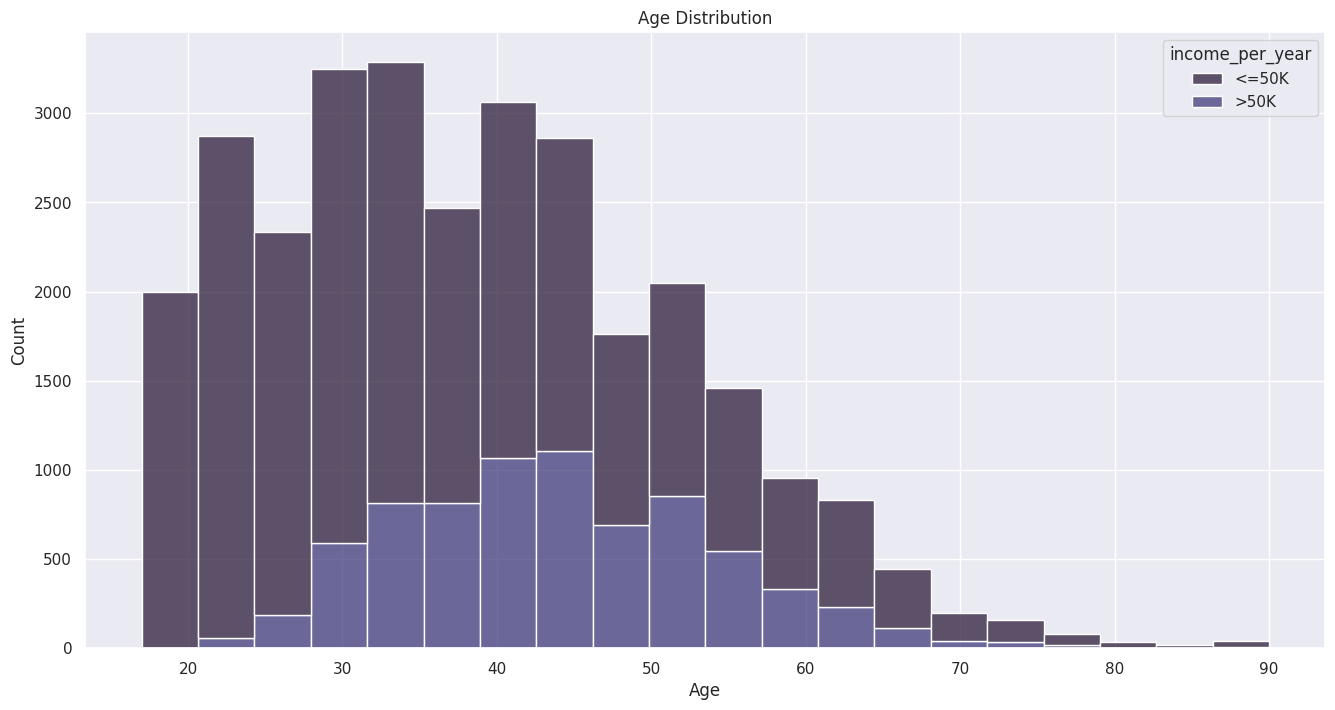

In [94]:
# Visual income distributed with Age
plt.figure(figsize=(16, 8))
sns.set_theme(style="darkgrid")
sns.set_palette("mako")
sns.histplot(data=df_census_income_clean, x='age', hue='income_per_year', bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

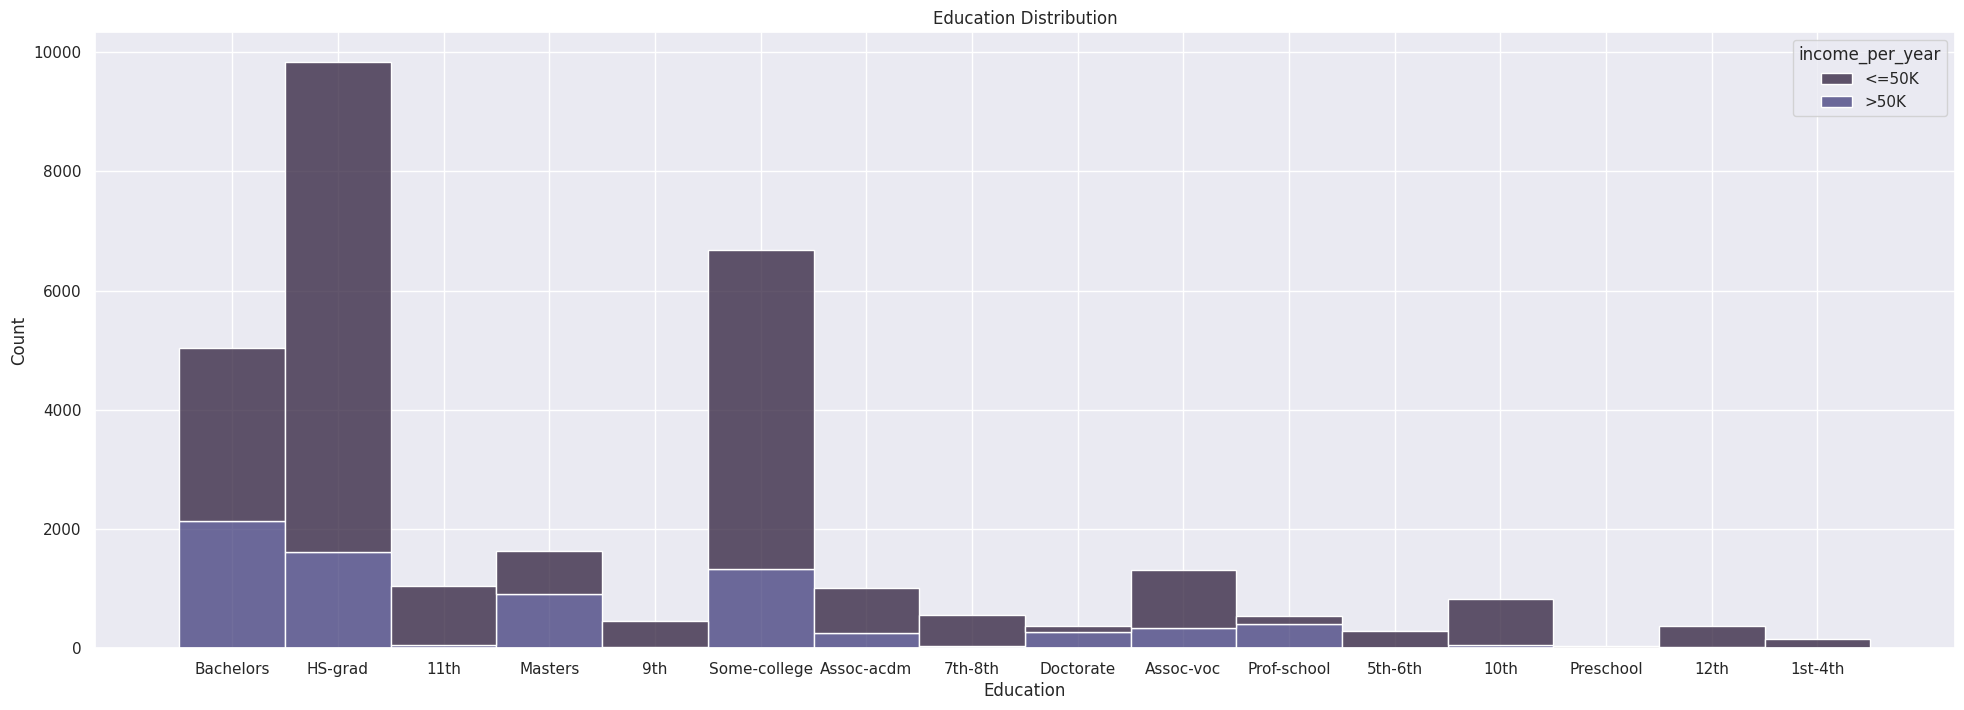

In [95]:
# Visual income distributed with Education
plt.figure(figsize=(24, 8))
sns.histplot(data=df_census_income_clean, x='education', hue='income_per_year', multiple='stack')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

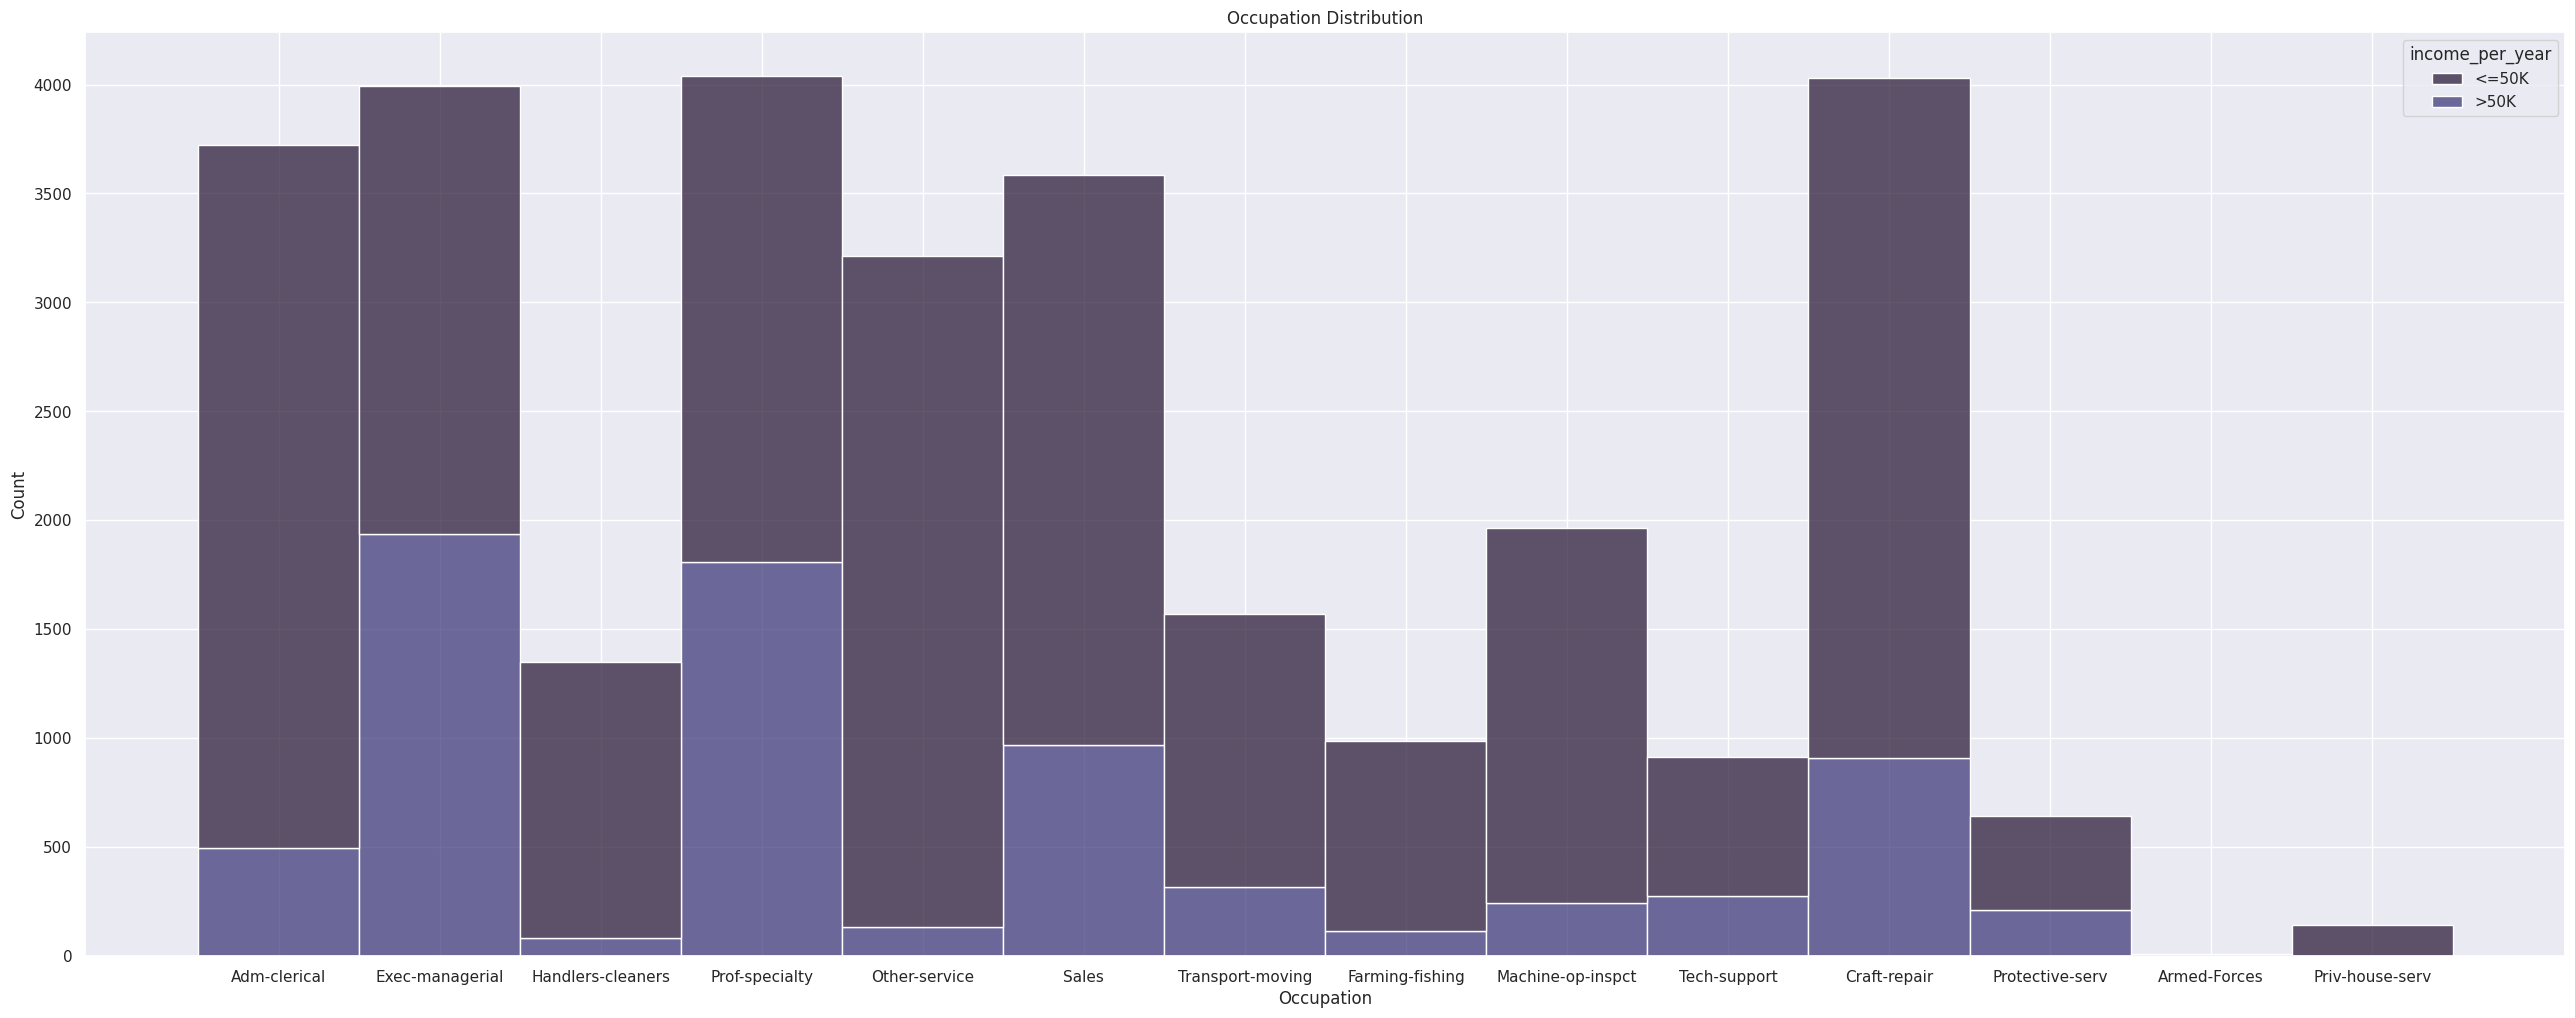

In [96]:
# Visual income distributed with Occupation
plt.figure(figsize=(32, 12))
sns.histplot(data=df_census_income_clean, x='occupation', hue='income_per_year', multiple='stack')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution')
plt.show()

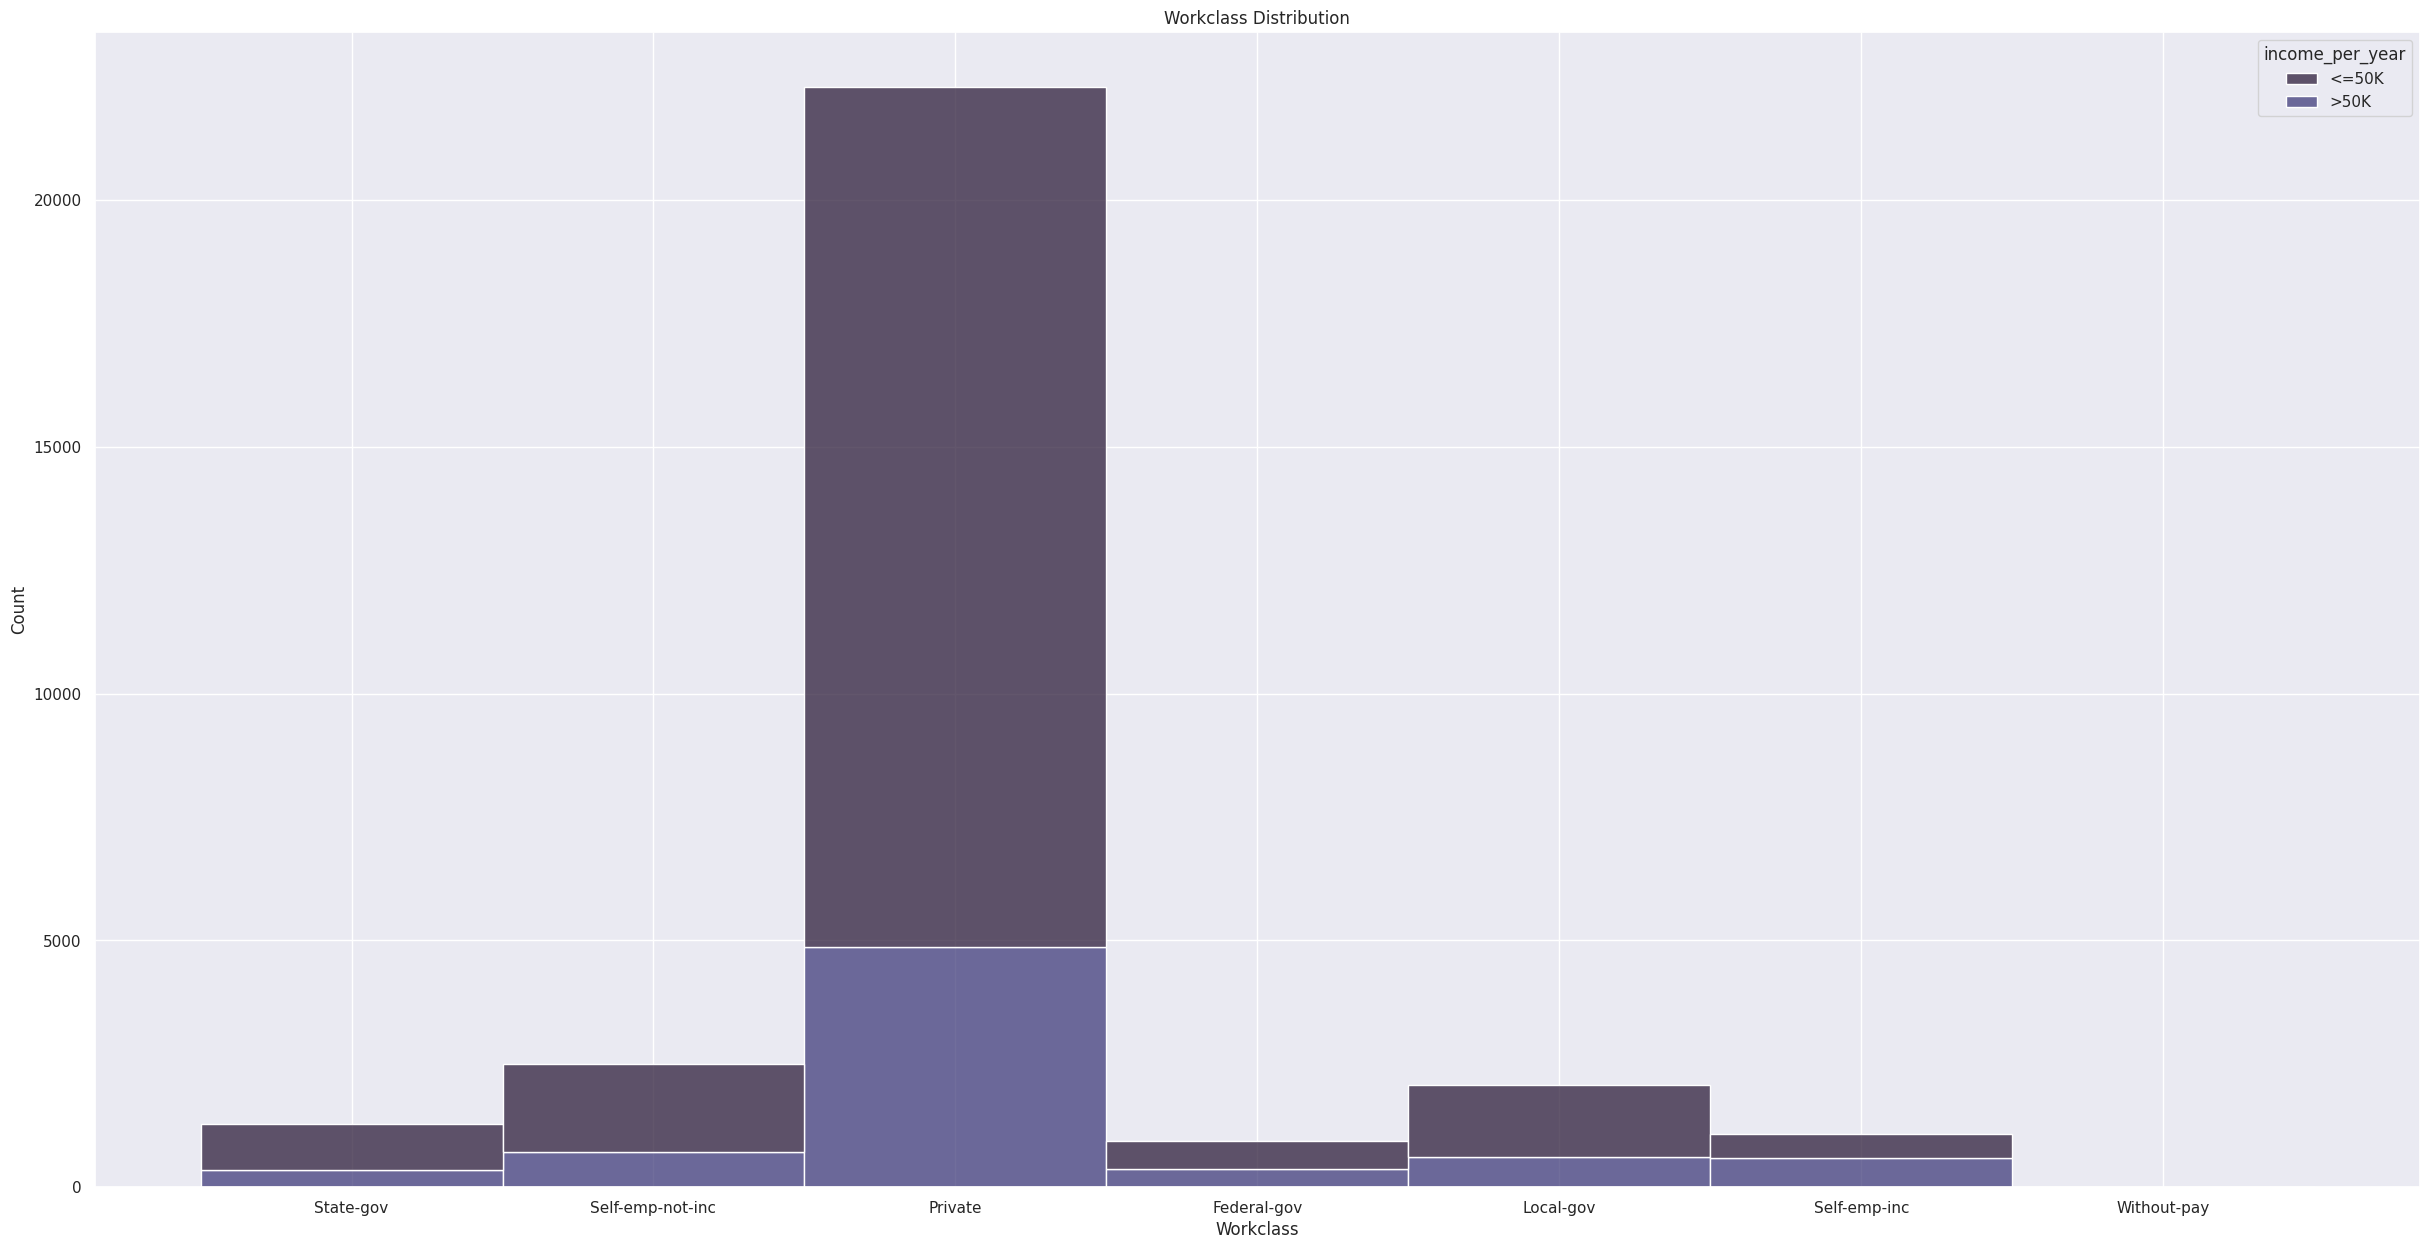

In [97]:
# Visual income distributed with Workclass
plt.figure(figsize=(30, 15))
sns.histplot(data=df_census_income_clean, x='workclass', hue='income_per_year', multiple='stack')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Workclass Distribution')
plt.show()

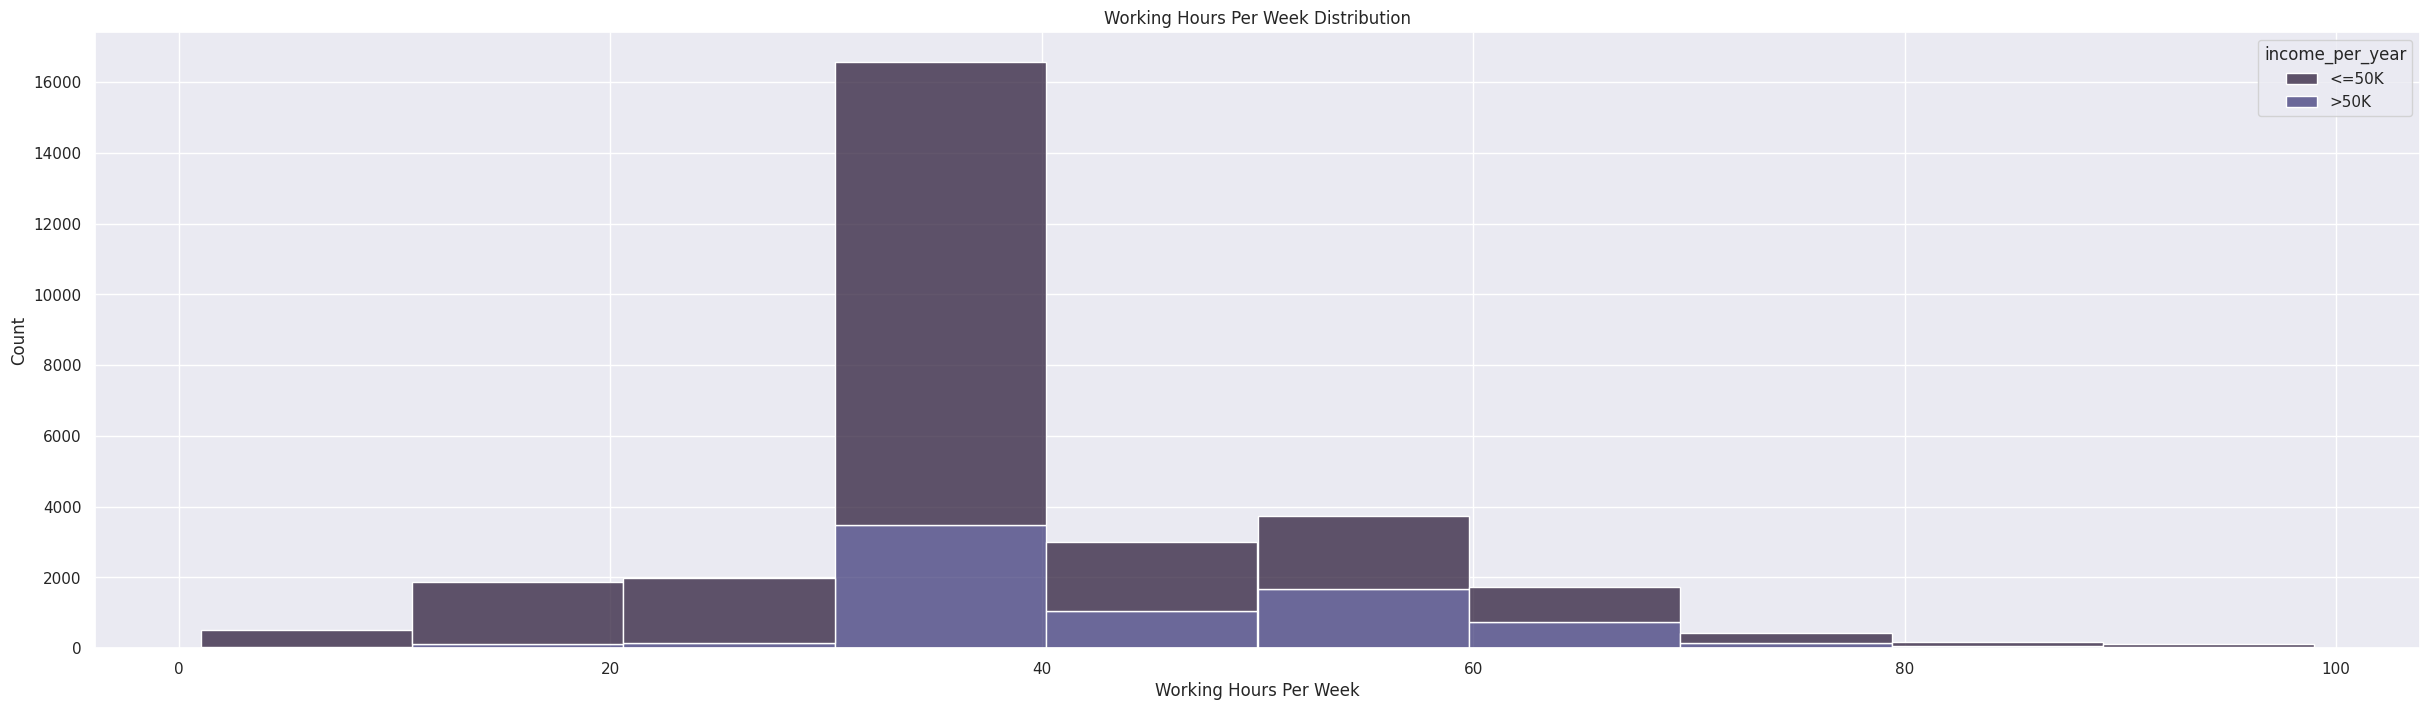

In [98]:
# Visual income distributed with Working Hours Per Week
plt.figure(figsize=(30, 8))
sns.histplot(data=df_census_income_clean, x='hours-per-week', hue='income_per_year', bins=10, multiple='stack')
plt.xlabel('Working Hours Per Week')
plt.ylabel('Count')
plt.title('Working Hours Per Week Distribution')
plt.show()

__Answer to question:__ with these above visuals we could have some finding:
- __Age__: the almost __>50K__ income from the census between 30 and 55 year old.
- __Education__: the high grade education (Bachelor, Master, Docters .. ) have high ratio of income that more than 50k per year.
- __Workclass__: with the nearly same ratio between income per year. However, the workclass in Private segment have huge number of income more than __50K__ per year.
- __Working Hours Per Week__: the clearly distribution that most of person who working more than 40 hours per week have the better income. 

In [99]:
# Visual 2 - Answer - Question: I would like to see the picture about the assosiation between booking cancel and other factors.

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load clean hotel-booking dataset
df_hotel_booking_clean = pd.read_csv('clean_data/cleaned_hotel_booking.csv')

df_hotel_booking_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [101]:
# Assosiation between "Canceled Booking" and "Maket Segment" 
# get subset group  by market_segment" and "is_canceled" variables
df_cnl_mkt = df_hotel_booking_clean.groupby(["market_segment", "is_canceled"]).size().reset_index(name="total")
df_cnl_mkt.head()

,market_segment,is_canceled,total
0,Aviation,0,185
1,Aviation,1,52
2,Complementary,0,646
3,Complementary,1,97
4,Corporate,0,4303


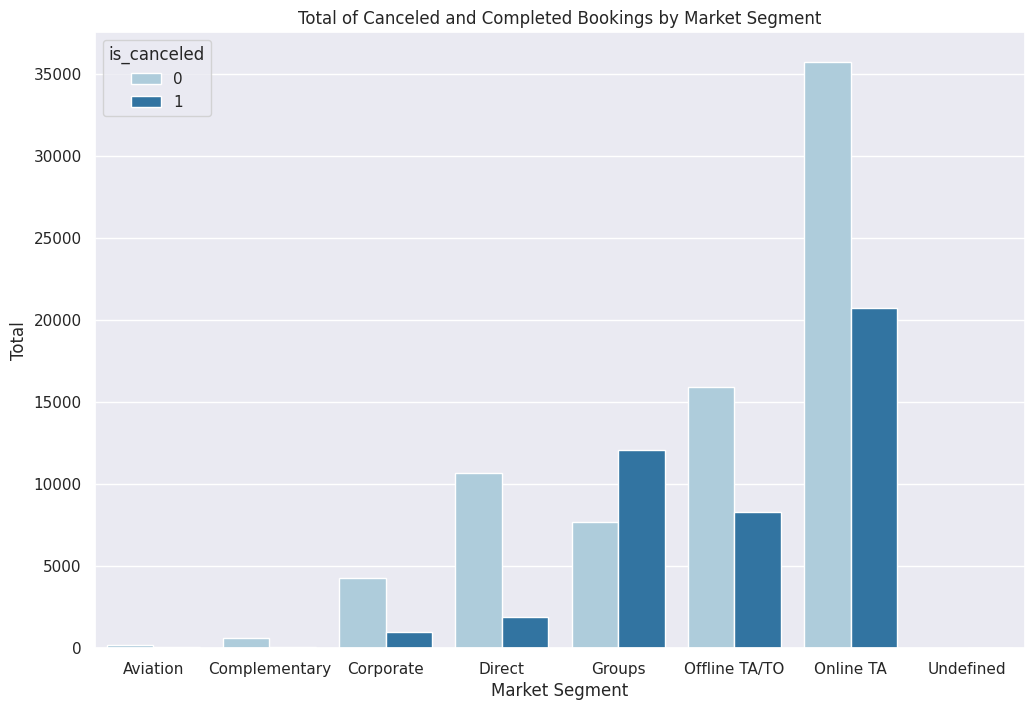

In [102]:
# Visual data with the barplot
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.set_palette("Paired")
sns.barplot(data=df_cnl_mkt, x="market_segment", y="total", hue="is_canceled")
plt.title("Total of Canceled and Completed Bookings by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Total")
plt.show()

__Answer to question:__ by visual picture we could have a understand that the highest canceled booking ratio droped on Aviation, Complementary, Corporate and Direct segment. In while, Groups segment is the best in completed booking ratio.

In [103]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Data_Wrangling_Project_Starter.ipynb

[NbConvertApp] Converting notebook Data_Wrangling_Project_Starter.ipynb to html
[NbConvertApp] Writing 1176399 bytes to Data_Wrangling_Project_Starter.html
